## EXERCICE 11 : Régression logistique et explicabilité

Vous voila maintenant prêts à utiliser vos connaissances méthodologiques et techniques pour l'étude de nouveaux cas. Nous allons maintenant tenter de distinguer des *8* et des *9* manuscrits à partir d'un modèle de régression logisique. Une fois le modèle appris et validé, nous expliquerons comment les décision sont prises en représentant les poids attribués aux différents pixels. 


(200, 784)
(200, 1)
8.53
(1800, 784)
(1800, 1)
8.51


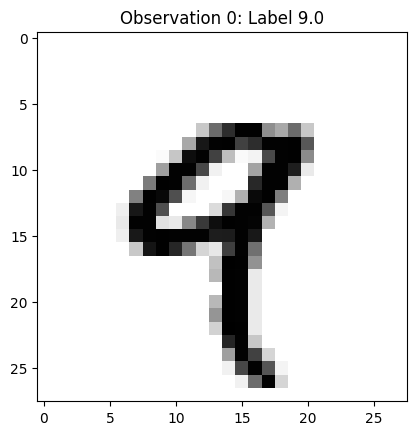

In [1]:

import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation


def ShowMNISTObservation(X_data,y_data,obsNb=0):
  plt.clf()
  plt.imshow(X_data[obsNb,:].reshape((28,28)),cmap='binary')
  plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb,0])))
  plt.show()


    
data=np.genfromtxt('./mnist_8_9.csv',delimiter=',')

n_tot=data.shape[0]
p=data.shape[1]

y_train=data[:200,0].reshape(-1,1)
X_train=data[:200,1:]

y_test=data[200:,0].reshape(-1,1)
X_test=data[200:,1:]


print(X_train.shape)
print(y_train.shape)
print(np.mean(y_train))
print(X_test.shape)
print(y_test.shape)
print(np.mean(y_test))

ShowMNISTObservation(X_train,y_train,obsNb=0)


### <span style="color:blue">QUESTIONS</span> 
    
#### <span style="color:blue">QUESTION 1</span> 
    
Bien comprendre la structuration des données dans l'exemple ci-dessus. Utilisez alors la classe de scikit-learn dédiée à la régression logistique pour apprendre à distinguer les 8 manuscrits les 9 manuscrits.
    
On notera que :
- les algorithmes d'apprentissage automatique sont souvent pré-calibrés pour prendre en entrée des données centrées-réduites dans le cas de données *tableaux*, ou des valeurs entre 0 et 1 dans le cas des données *images*.
- Les labels des deux classes en sortie (i.e. dans Y) seront 0 ou 1.

#### <span style="color:blue">REPONSE 1 </span> 

    




In [2]:
#normalize the data
max_intensity=np.max([ np.max(X_train),np.max(X_test) ])
min_intensity=np.max([ np.min(X_train),np.min(X_test) ])

X_train=(X_train-min_intensity)/(max_intensity-min_intensity)
X_test=(X_test-min_intensity)/(max_intensity-min_intensity)

y_train=1.*(y_train>8.5)
y_test=1.*(y_test>8.5)


In [3]:
#train the classifier
from sklearn.linear_model import LogisticRegression


regressor=LogisticRegression()

regressor.fit(X_train,y_train.reshape(-1))


LogisticRegression()

On pourra remarquer que le nombre d'observations est inférieur à la dimension des observations. En regardant les paramètres par défaut de *LogisticRegression*, on peut voir que de la régularisation L2 est en fait utilisée. Le problème est ainsi bien posé.


#### <span style="color:blue">QUESTION 2</span> 

Une fois les paramètres du classifieur appris, validez son efficacité. 
    
#### <span style="color:blue">REPONSE 2</span> 


In [4]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

print('Percentage of false predictions on the training set:')
print(100*np.mean(y_train_pred-y_train.reshape(-1)))
print('\nPercentage of false predictions on the test set:')
print(100*np.mean(y_test_pred-y_test.reshape(-1)))

Percentage of false predictions on the training set:
0.0

Percentage of false predictions on the test set:
2.944444444444444


    
#### <span style="color:blue">QUESTION 3</span> 

Visualisez les poids attribués à chaque pixel dans le classifieur pour expliquer quels pixels sont les plus influents dans la prise de décision.
    
#### <span style="color:blue">REPONSE 3</span> 


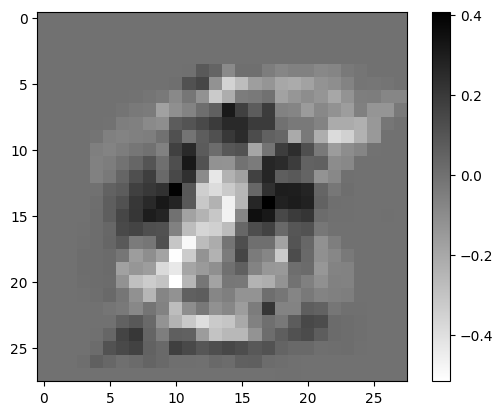

In [5]:

plt.clf()
plt.imshow((regressor.coef_).reshape((28,28)),cmap='binary')
plt.colorbar()
plt.show()


Résultat assez bruité et difficile à interpréter

#### <span style="color:blue">QUESTION 4</span> 

Régularisez le problème d'appentissage, de manière à utiliser par la suite moins de 10 pixels pour la prise de décision. Représentez alors ces pixels. La localisation de ces points automatiquement détectés, vous semble-t-elle avoir du sens ? La précision des prédiction est-elle beaucoup pénalisée ? 
    
#### <span style="color:blue">REPONSE 4</span> 


In [6]:

def regressorTrainer(CoefPenalty,X_train,y_train,X_test,y_test):
    regressor=LogisticRegression(penalty='l1', C=CoefPenalty,solver='saga')
    regressor.fit(X_train,y_train.reshape(-1))
    y_train_pred=regressor.predict(X_train)
    y_test_pred=regressor.predict(X_test)
    
    print('Percentage of false predictions on the training set:')
    print(100*np.mean(y_train_pred-y_train.reshape(-1)))
    print('\nPercentage of false predictions on the test set:')
    print(100*np.mean(y_test_pred-y_test.reshape(-1)))
    print('\nNumber of significant coefficients:')
    print(np.sum((np.abs(regressor.coef_)>0.001)))
    
    return regressor



In [7]:

regressor=regressorTrainer(1.,X_train,y_train,X_test,y_test)


Percentage of false predictions on the training set:
0.0

Percentage of false predictions on the test set:
4.666666666666667

Number of significant coefficients:
88


/home/raphi/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:

regressor=regressorTrainer(0.1,X_train,y_train,X_test,y_test)


Percentage of false predictions on the training set:
4.0

Percentage of false predictions on the test set:
10.055555555555555

Number of significant coefficients:
14


/Users/lrisser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [9]:
regressor=regressorTrainer(0.06,X_train,y_train,X_test,y_test)


Percentage of false predictions on the training set:
7.5

Percentage of false predictions on the test set:
14.444444444444443

Number of significant coefficients:
9


/Users/lrisser/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


On garde celui là !

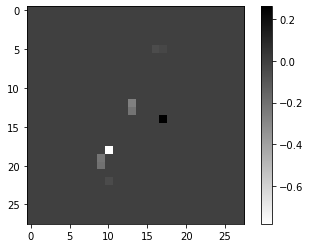

In [10]:
plt.clf()
plt.imshow((regressor.coef_).reshape((28,28)),cmap='binary')
plt.colorbar()
plt.show()


La précision des résultats est déteriorée mais reste correcte si l'on tient compte du fait qu'on append sur peu de données vis à vis de la dimension, et surtout qu'on sélectionne un sous-ensemble très réduit de points à la vue de la variabilité spatiale des chiffres manuscrits. 

Plusieurs points ressortent particulièrement dans la zone en bas à gauche de là où sont représentés les chiffres manuscrits. C'est en effet là où on s'attend à avoir le plus de variabilité entre des 8 et des 9 manuscits !
